# **Project 3: Diabetes Prediction using Logistic Regression**

**Objective:**

To classify whether a patient is diabetic based on clinical measurements such as glucose, BMI, insulin, and age.

To build a logistic regression model for early diabetes detection and risk assessment.

To interpret feature coefficients to understand major medical risk indicators.

To evaluate classification performance using accuracy-based and probabilistic metrics.

**Problem Type:**
Classification (Binary target variable — Diabetic / Non-Diabetic)

**🔧 Evaluation Metrics:**

Accuracy

Precision, Recall, F1-Score

ROC-AUC Score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/QIP_IIIT_A/Learning/Model Projects/Logistic Regression/Diabetese/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Exploratory Data Anslytics**

**1️⃣ Univariate Analysis (Feature Distributions)**

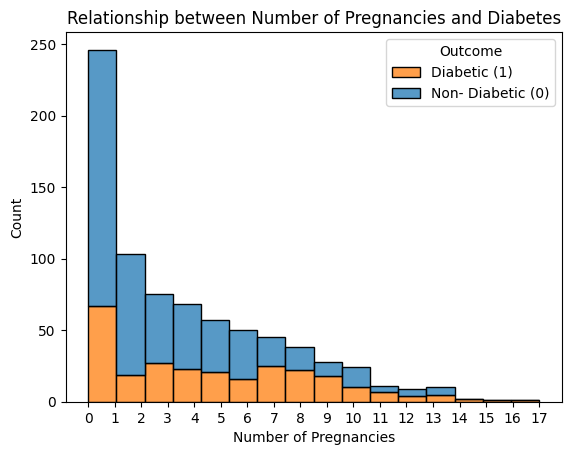

In [ ]:
sns.histplot(x='Pregnancies', hue='Outcome', data=df, multiple='stack')
max_preg = df['Pregnancies'].max() + 1  # +1 to include the max value as a tick
plt.xticks(range(0, max_preg, 1))
plt.title('Relationship between Number of Pregnancies and Diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

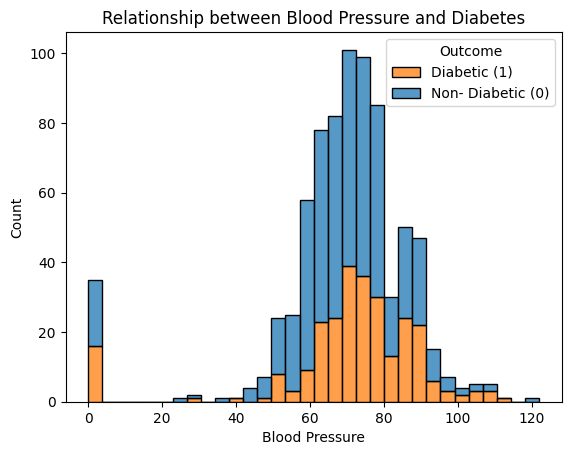

In [ ]:
sns.histplot(x='BloodPressure', hue='Outcome', data=df, multiple='stack')
plt.title('Relationship between Blood Pressure and Diabetes')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

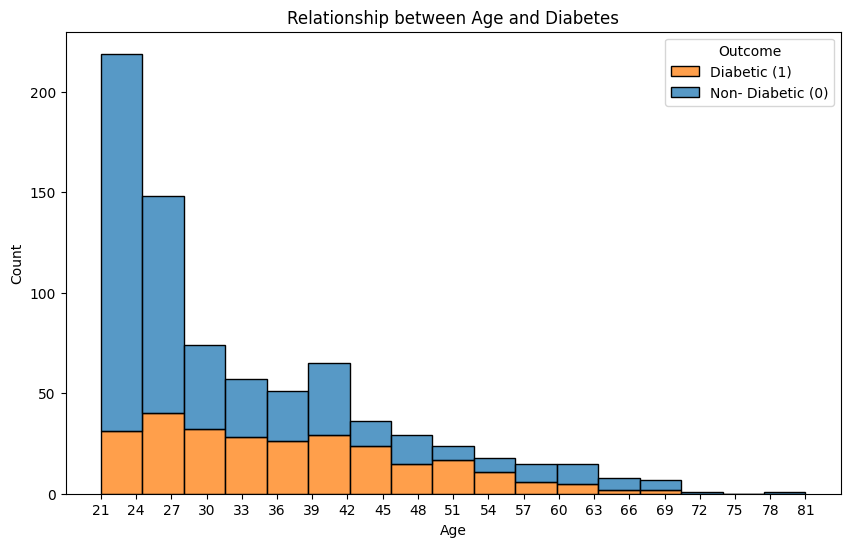

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='Age', hue='Outcome', data=df, multiple='stack')
min_age = df['Age'].min()
max_age = df['Age'].max() + 1
plt.xticks(range(min_age, max_age, 3))
plt.title('Relationship between Age and Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

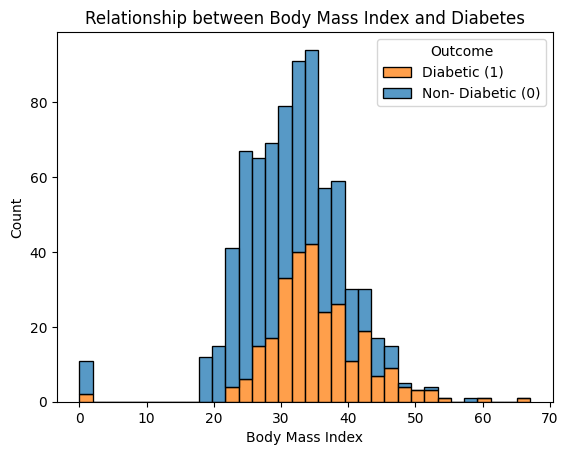

In [ ]:
sns.histplot(x='BMI', hue='Outcome', data=df, multiple='stack')
plt.title('Relationship between Body Mass Index and Diabetes')
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

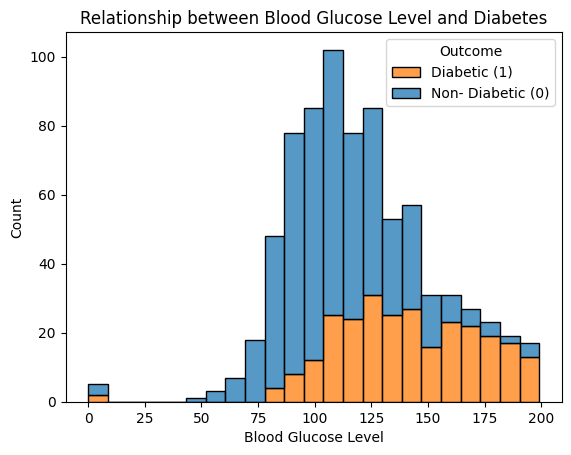

In [ ]:
sns.histplot(x='Glucose', hue='Outcome', data=df, multiple='stack')
plt.title('Relationship between Blood Glucose Level and Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

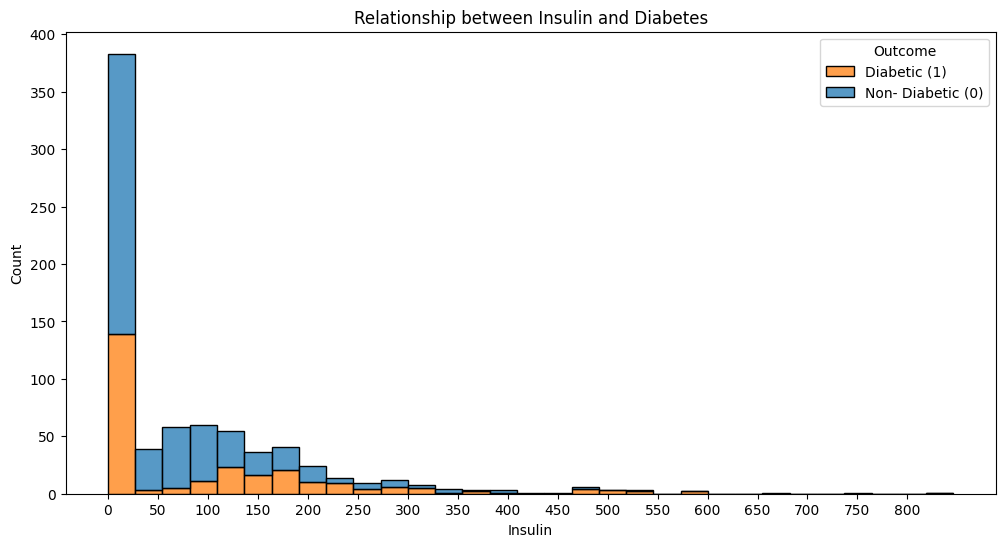

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='Insulin', hue='Outcome', data=df, multiple='stack')
min_insulin = df['Insulin'].min()
max_insulin = df['Insulin'].max() + 1
plt.xticks(range(min_insulin, max_insulin, 50))
plt.title('Relationship between Insulin and Diabetes')
plt.xlabel('Insulin')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

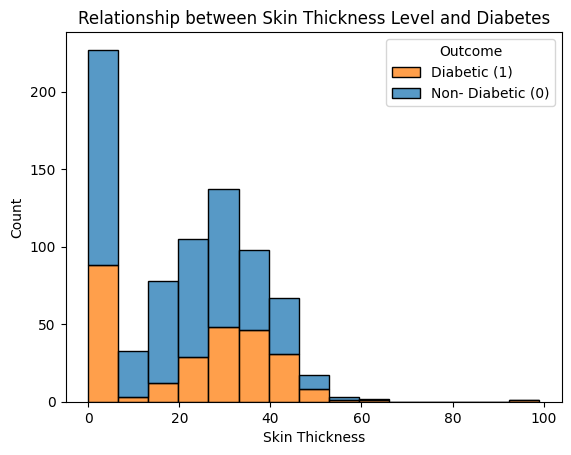

In [ ]:
sns.histplot(x='SkinThickness', hue='Outcome', data=df, multiple='stack')
plt.title('Relationship between Skin Thickness Level and Diabetes')
plt.xlabel('Skin Thickness')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

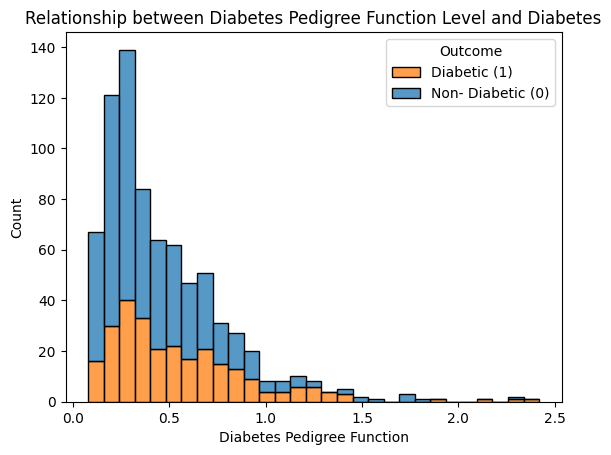

In [ ]:
sns.histplot(x='DiabetesPedigreeFunction', hue='Outcome', data=df, multiple='stack')
plt.title('Relationship between Diabetes Pedigree Function Level and Diabetes')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Diabetic (1)', 'Non- Diabetic (0)'])
plt.show()

**2️⃣ Bivariate Analysis (Feature vs Target)**

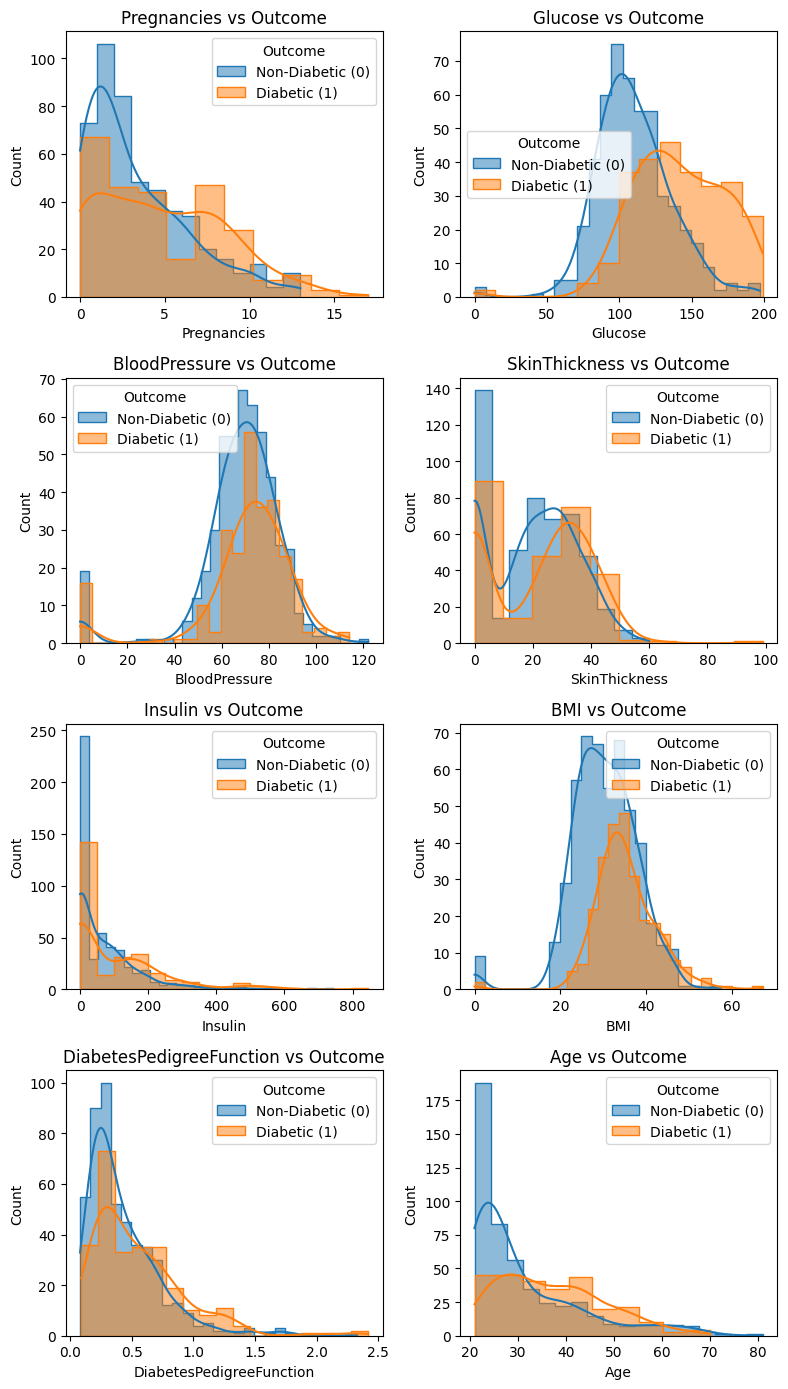

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

fig, axes = plt.subplots(4, 2, figsize=(8, 14))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    for val, label in [(0, 'Non-Diabetic (0)'), (1, 'Diabetic (1)')]:
        subset = df[df['Outcome'] == val]
        sns.histplot(data=subset, x=feature, element='step', kde=True, ax=ax, label=label)
    ax.set_title(f'{feature} vs Outcome')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Outcome')

plt.tight_layout()
plt.show()

# **Feature Correlation Summary**

In [ ]:
corr = df.corr(numeric_only=True)

<Axes: >

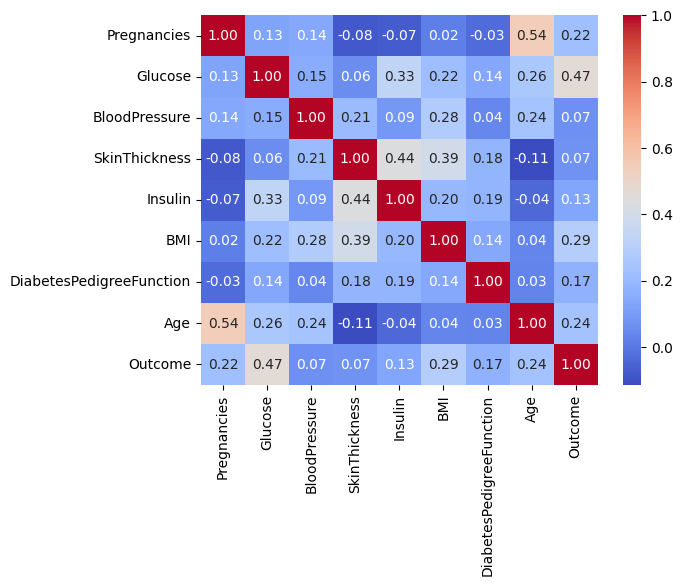

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# **Standardization**

In [ ]:
y = df['Outcome']
x= df.drop(['Outcome', 'Insulin', 'SkinThickness'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=47)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

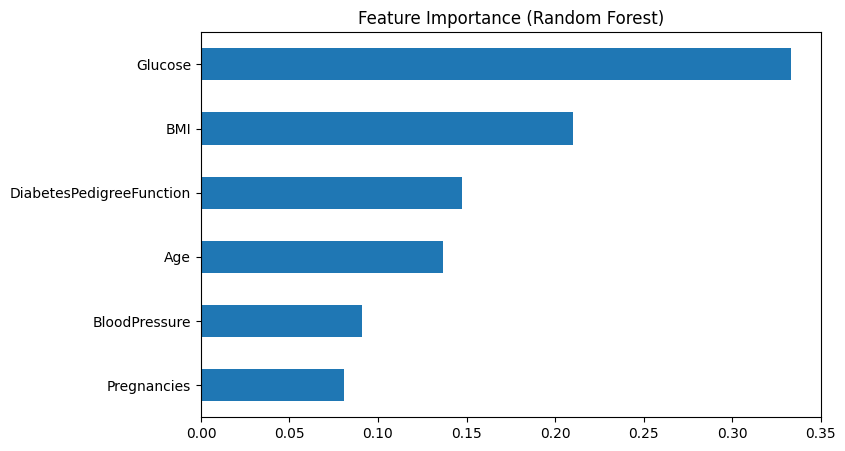

In [ ]:
importances = pd.Series(rf.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

# **Model Building & Evaluation**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533

Confusion Matrix:
 [[95 13]
 [25 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       108
           1       0.62      0.46      0.53        46

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154



In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7597402597402597

Confusion Matrix:
 [[86 22]
 [15 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       108
           1       0.58      0.67      0.63        46

    accuracy                           0.76       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.77      0.76      0.76       154



# **Visualization**

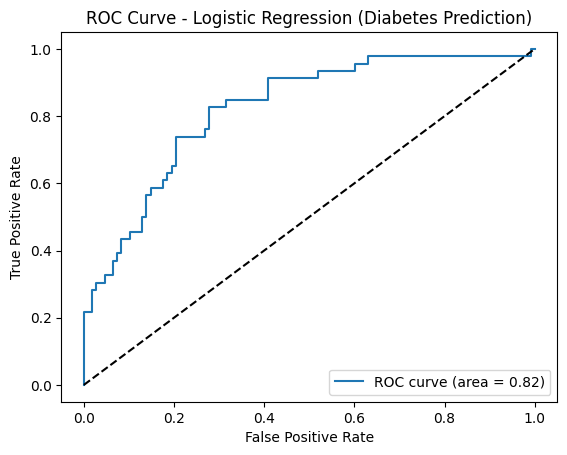

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Diabetes Prediction)")
plt.legend(loc="lower right")
plt.show()

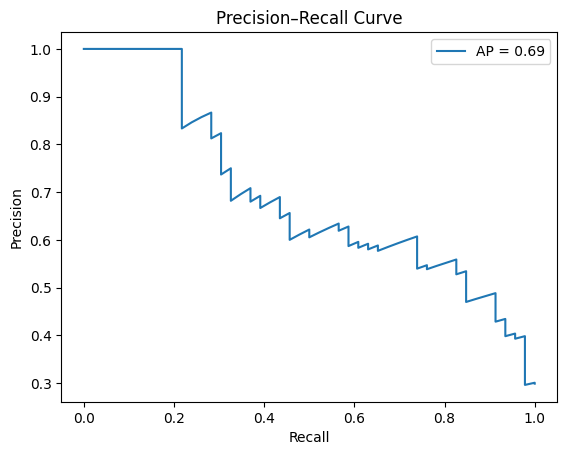

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend()
plt.show()

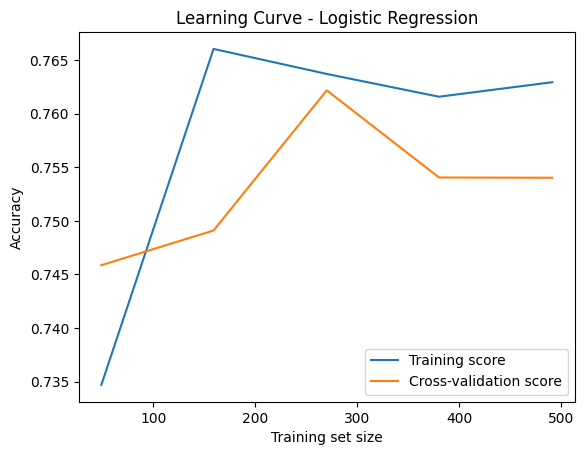

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend()
plt.show()